# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in your list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp_kelvin = city_weather["main"]["temp_max"]
        city_max_temp_celsius = city_max_temp_kelvin - 273.15  # Convert from Kelvin to Celsius
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp_celsius,  # Store in Celsius
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the city_data list into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)




Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | neiafu
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | nazarovo
Processing Record 6 of Set 1 | iringa
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | fenghua
Processing Record 10 of Set 1 | rio grande
Processing Record 11 of Set 1 | zaragoza
Processing Record 12 of Set 1 | zapolyarnyy
Processing Record 13 of Set 1 | st. john's
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | puerto deseado
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | bhag
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | tofol
Processing Record 22 of Set 1 | fortaleza
Processing Record 23 of Set 1

Processing Record 40 of Set 4 | ugoofaaru
Processing Record 41 of Set 4 | belyy yar
Processing Record 42 of Set 4 | kristiansund
Processing Record 43 of Set 4 | redencao
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | fisterra
Processing Record 46 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 47 of Set 4 | buka
Processing Record 48 of Set 4 | al burayqah
Processing Record 49 of Set 4 | formosa do rio preto
Processing Record 0 of Set 5 | robore
Processing Record 1 of Set 5 | hermanus
Processing Record 2 of Set 5 | ko pha ngan
Processing Record 3 of Set 5 | balqash
Processing Record 4 of Set 5 | cabedelo
Processing Record 5 of Set 5 | la rioja
Processing Record 6 of Set 5 | santana
Processing Record 7 of Set 5 | uturoa
Processing Record 8 of Set 5 | dire dawa
Processing Record 9 of Set 5 | krakeel
Processing Record 10 of Set 5 | longyearbyen
Processing Record 11 of Set 5 | catumbela
Processing Record 12 of Set 5 | shingu
Processing Record 13 of

City not found. Skipping...
Processing Record 35 of Set 8 | port alfred
Processing Record 36 of Set 8 | vorgashor
Processing Record 37 of Set 8 | la passe
Processing Record 38 of Set 8 | colonia
Processing Record 39 of Set 8 | shchyolkino
Processing Record 40 of Set 8 | trostyanets'
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | uyuni
Processing Record 43 of Set 8 | marion
Processing Record 44 of Set 8 | el haouaria
Processing Record 45 of Set 8 | xining
Processing Record 46 of Set 8 | tumayr
Processing Record 47 of Set 8 | panyutyne
Processing Record 48 of Set 8 | batamshinskiy
Processing Record 49 of Set 8 | salinopolis
Processing Record 0 of Set 9 | novomichurinsk
Processing Record 1 of Set 9 | tamanrasset
Processing Record 2 of Set 9 | dunda
Processing Record 3 of Set 9 | baxter
Processing Record 4 of Set 9 | bayt al faqih
Processing Record 5 of Set 9 | sinan
Processing Record 6 of Set 9 | sitampiky
City not found. Skipping...
Processing Record 7 of Set 9 

Processing Record 23 of Set 12 | issenye
Processing Record 24 of Set 12 | ishim
Processing Record 25 of Set 12 | arkhangel'sk
Processing Record 26 of Set 12 | nouadhibou
Processing Record 27 of Set 12 | forde
Processing Record 28 of Set 12 | thinadhoo
Processing Record 29 of Set 12 | ceelbuur
Processing Record 30 of Set 12 | san andros
City not found. Skipping...
Processing Record 31 of Set 12 | sarangarh
Processing Record 32 of Set 12 | rikaze
Processing Record 33 of Set 12 | carahue
Processing Record 34 of Set 12 | kudahuvadhoo
Processing Record 35 of Set 12 | tazacorte
Processing Record 36 of Set 12 | zahle
Processing Record 37 of Set 12 | kristianstad
Processing Record 38 of Set 12 | qui nhon
Processing Record 39 of Set 12 | zhangye
Processing Record 40 of Set 12 | mponela
Processing Record 41 of Set 12 | verkhnevilyuysk
Processing Record 42 of Set 12 | zherdevka
Processing Record 43 of Set 12 | livingstone
Processing Record 44 of Set 12 | itabera
Processing Record 45 of Set 12 | t

In [4]:

# Create a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)



# Show the record count
city_data_df.count()



City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [5]:
# Display sample data
city_data_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,neiafu,-18.6500,-173.9833,24.44,75,19,8.05,TO,1694683298
1,papatowai,-46.5619,169.4708,8.29,90,93,8.37,NZ,1694683298
2,albany,42.6001,-73.9662,12.81,93,0,2.07,US,1694683292
3,geraldton,-28.7667,114.6000,20.23,60,2,4.63,AU,1694683161
4,nazarovo,56.0064,90.3914,19.26,54,3,2.06,RU,1694683301


In [6]:
city_data_df.to_csv(r"C:\Users\User\OneDrive\Desktop\python-challenge-api\Module_challenge_6\WeatherPy\output_data\cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\python-challenge-api\Module_challenge_6\WeatherPy\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neiafu,-18.6500,-173.9833,24.44,75,19,8.05,TO,1694683298
1,papatowai,-46.5619,169.4708,8.29,90,93,8.37,NZ,1694683298
2,albany,42.6001,-73.9662,12.81,93,0,2.07,US,1694683292
3,geraldton,-28.7667,114.6000,20.23,60,2,4.63,AU,1694683161
4,nazarovo,56.0064,90.3914,19.26,54,3,2.06,RU,1694683301


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

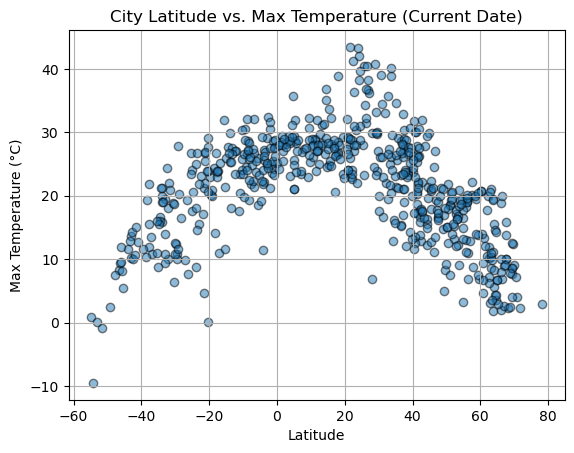

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

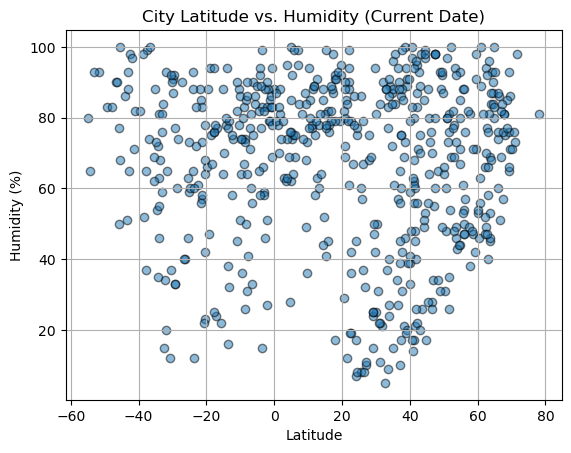

In [9]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

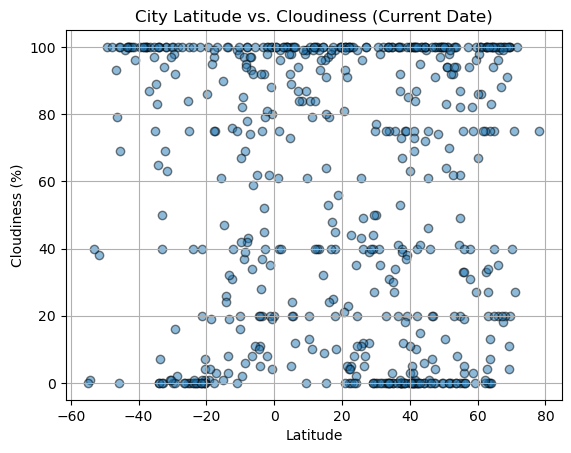

In [10]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

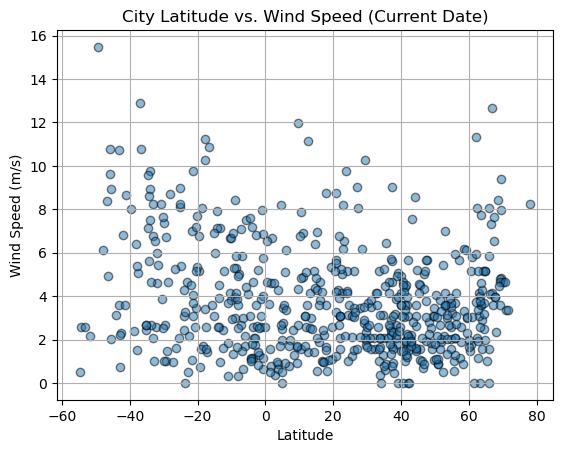

In [43]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, coordinates):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values*slope + intercept
    line_eq =f'y ={slope: .2f}x +{intercept: .2f}'

    # Create a scatter plot
    plt.scatter(x_values, y_values, marker='o', edgecolors='black', alpha=0.5, )

    # Create a regression line using the linear regression equation
    regression_line = [slope * x + intercept for x in x_values]

    # Plot the regression line
    plt.plot(x_values, regress_values, "r-", label=line_eq)
    


    # Add labels and a legend
  
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    print(f"The r-squred value is: {r_value**2: .16f}")
    print(f"The r-value is: {r_value: .16f}")
    plt.legend()      
    plt.grid(True)
    plt.show()
     

    
          

   

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,albany,42.6001,-73.9662,12.81,93,0,2.07,US,1694683292
4,nazarovo,56.0064,90.3914,19.26,54,3,2.06,RU,1694683301
6,bethel,41.3712,-73.4140,17.20,80,75,1.54,US,1694683302
8,fenghua,29.6563,121.4064,23.94,94,75,2.00,CN,1694683303
10,zaragoza,41.6561,-0.8773,21.92,60,0,3.60,ES,1694683305


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,neiafu,-18.6500,-173.9833,24.44,75,19,8.05,TO,1694683298
1,papatowai,-46.5619,169.4708,8.29,90,93,8.37,NZ,1694683298
3,geraldton,-28.7667,114.6000,20.23,60,2,4.63,AU,1694683161
5,iringa,-7.7667,35.7000,21.84,41,43,5.00,TZ,1694683301
7,adamstown,-25.0660,-130.1015,17.67,59,100,8.12,PN,1694683303


###  Temperature vs. Latitude Linear Regression Plot

The r-squred value is:  0.5392001074205097
The r-value is: -0.7343024631720295


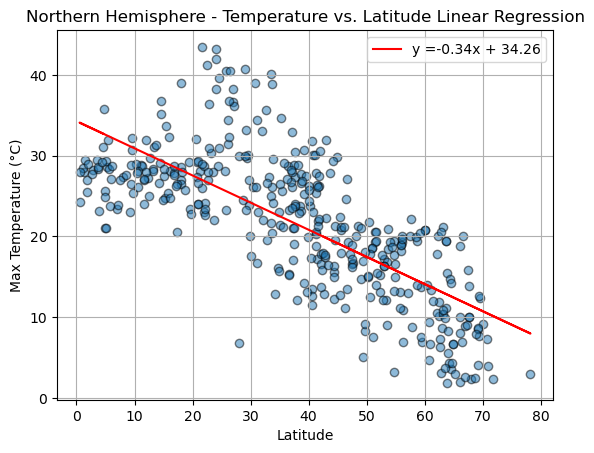

In [42]:
# Linear regression on Northern Hemisphere
# Filter data for the Nouthern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] > 0]

# Use the function information to plot
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Northern Hemisphere - Temperature vs. Latitude Linear Regression", (-30, 10))



The r-squred value is:  0.5689004571238511
The r-value is:  0.7542549019554670


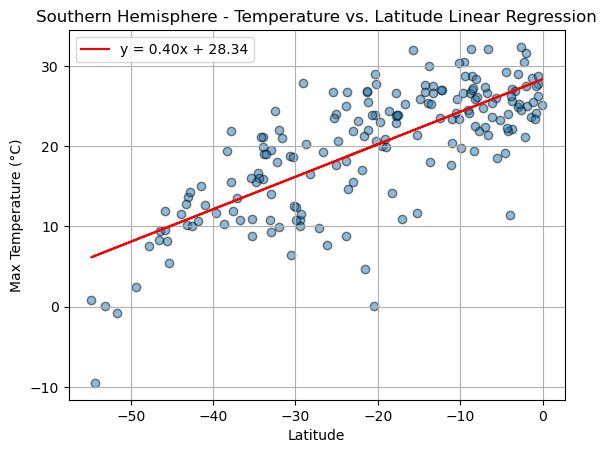

In [35]:
# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Use the function information to plot
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Temperature vs. Latitude Linear Regression", (-30, 10))



**Discussion about the linear relationship:** In the Northern Hemisphere, our analysis reveals a clear link between latitude and temperature, as indicated by an r-value close to -1 (it's -0.73). **As moving away from the equator, temperature tends to decrease linearly.** The value of the r-squared is 0.54, which means that the model explains 54% of the variation in temperature using latitude. The regression equation, given by 'y = -0.34 * x + 34.26,' estimates temperature changes with latitude.

Conversely, in the Southern Hemisphere, we observe a strong connection between latitude and temperature, reflected by an r-value close to 1 (it's 0.75). **As moving toward the equator, temperature tends to increase linearly.** Again, the high R-squared value of 0.57 demonstrates that the linear regression model fits the data well. The regression equation, given by 'y = 0.40 * x + 28.34,' behaves similarly to the Northern Hemisphere but with a positive gradient.

Though the correlations observed in the two hemispheres are different, they convey the same intuitive message: as you move away from the equator towards the north or south, you will experience a decrease in temperature.



### Humidity vs. Latitude Linear Regression Plot

The r-squred value is:  0.0002774766869392
The r-value is: -0.0166576314924773


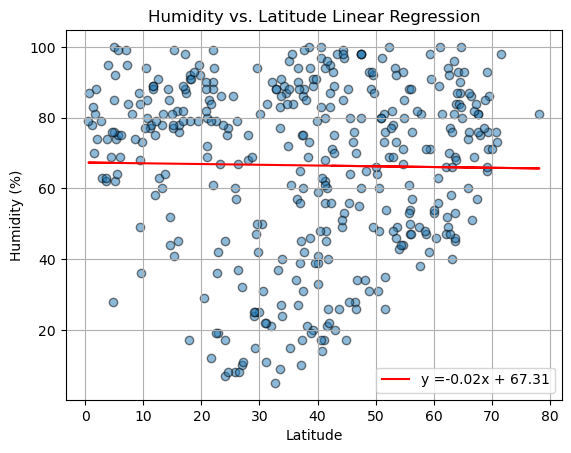

In [36]:
# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Call the plot_linear_regression function for Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Humidity vs. Latitude Linear Regression", (40, 20))


The r-squred value is:  0.0010631031708115
The r-value is: -0.0326052629311826


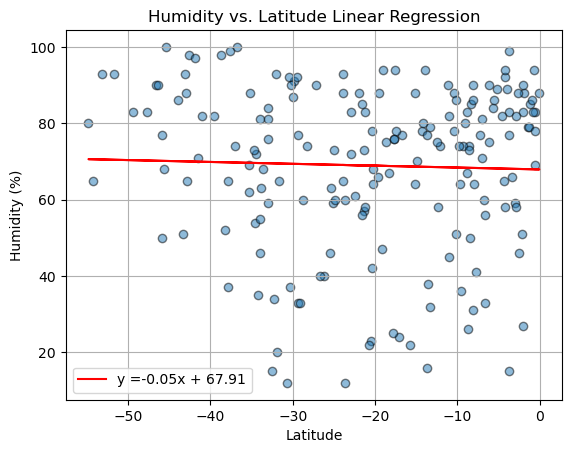

In [37]:
# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Call the plot_linear_regression function for Humidity vs. Latitude 
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Humidity vs. Latitude Linear Regression", (-30, 20))


**Discussion about the linear relationship:** In the Northern Hemisphere, the analysis shows an exceptionally low r-squared value of 0.0003, indicating that Latitude explains a very small fraction of the variation in Humidity. The nearly zero r-value (-0.0167) further reinforces this, implying **an almost non-existent linear relationship between Latitude and Humidity**. The regression equation, y = -0.02x + 67.31, which has a very small negative slope, suggests no significant relationship between Latitude and Humidity.

Similarly, in the Southern Hemisphere, the analysis reveals an extremely low r-squared value of 0.0011, signifying that Latitude explains **a negligibly small percentage of variation in Humidity using latitude.** The r-value of -0.0326 further emphasizes the lack of a linear relationship between Latitude and Humidity. The regression equation, y = -0.05x + 67.91, illustrates an extremely low negative slope.
In addition to the non-existent linearity, this shows that in the Northern Hemisphere, humidity decreases slightly when moving away from the equator, whereas in the Southern Hemisphere, humidity increases when moving away from the equator.


### Cloudiness vs. Latitude Linear Regression Plot

The r-squred value is:  0.0055273971337897
The r-value is: -0.0743464668547852


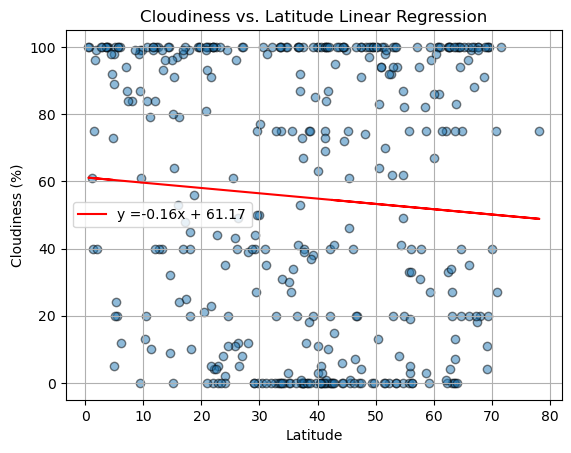

In [38]:
# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Call the plot_linear_regression function for Cloudiness vs. Latitude 
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Cloudiness vs. Latitude Linear Regression", (40, 20))


The r-squred value is:  0.0175482684900539
The r-value is: -0.1324698776705628


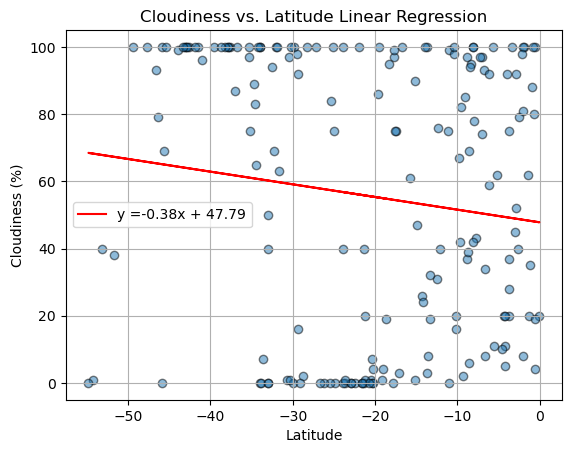

In [39]:
# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Call the plot_linear_regression function for Cloudiness vs. Latitude 
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Cloudiness vs. Latitude Linear Regression", (-30, 20))


**Discussion about the linear relationship:** In the Northern Hemisphere, the analysis reveals an extremely low r-squared value of 0.0055, indicating that Latitude explains only a very small portion of the variation in Cloudiness. The r-value of -0.0743 further indicates **almost no linear relationship between Latitude and Cloudiness.** The regression equation, y = -0.16x + 61.17, has a slight negative slope, suggesting that latitude has no considerable impact on Cloudiness using this model.
In the Southern Hemisphere, the analysis shows a relatively low but improved r-squared value of 0.0175 compared to the Northern Hemisphere. This suggests that Latitude explains the variation in Cloudiness better in this region. The R-value of -0.1325 (which is close to 0) indicates **a very weak negative linear relationship between Latitude and Cloudiness.** The regression equation, y = -0.38x + 47.79, indicates a negative slope, implying that as Latitude decreases (approaching the equator), Cloudiness tends to decrease slightly.

It is observed that cloudiness reduces when moving away from the equator in the northern hemisphere slightly, but in the southern hemisphere, it behaves in the opposite manner.



### Wind Speed vs. Latitude Linear Regression Plot

The r-squred value is:  0.0039324483867902
The r-value is:  0.0627092368538339


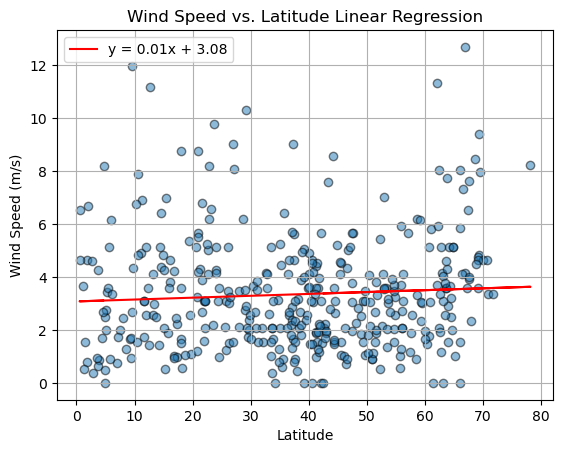

In [40]:
# Filter data for the Northern Hemisphere
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Call the plot_linear_regression function for Wind Speed vs. Latitude 
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Wind Speed vs. Latitude Linear Regression", (40, 10))



The r-squred value is:  0.0665684021307932
The r-value is: -0.2580085311201806


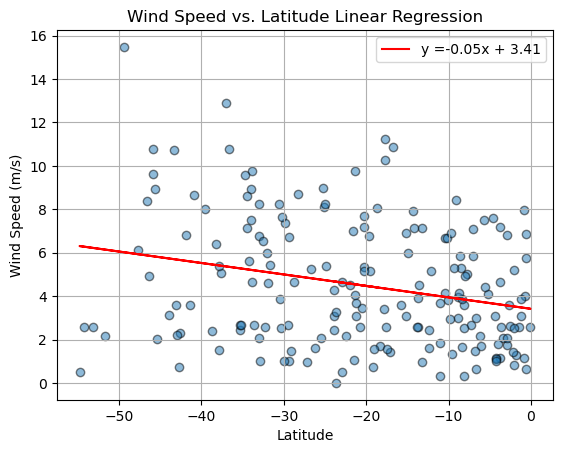

In [41]:
# Filter data for the Southern Hemisphere
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Call the plot_linear_regression function for Wind Speed vs. Latitude 
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed (m/s)", "Wind Speed vs. Latitude Linear Regression", (-30, 10))



**Discussion about the linear relationship:** In the Northern Hemisphere, the analysis shows a very low r-squared value of 0.0039, indicating that Latitude explains only a small fraction of the variation in Wind Speed. The positive r-value of 0.0627, which has a statistically significant relationship, implies **a weak positive linear correlation between Latitude and Wind Speed.** The regression equation, y = 0.01x + 3.08, demonstrates a shallow positive slope. As Latitude increases (moving away from the equator), Wind Speed tends to increase slightly according to this linear model. However, the impact of Latitude on Wind Speed is notably weak.

In the Southern Hemisphere, the analysis reveals a low r-squared value of 0.0666, indicating that Latitude explains a small portion of the variation in Wind Speed. The negative r-value of -0.2580, while statistically significant, suggests **a weak negative linear correlation between Latitude and Wind Speed**. The regression equation, y = -0.05x + 3.41, displays a low negative slope. As Latitude increases (moving closer to the equator), Wind Speed tends to decrease slightly according to this linear model.

It's worth mentioning that as one moves away from the equator, the Southern Hemisphere experiences a more substantial increase in Wind Speed compared to the Northern Hemisphere





